In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from scipy import stats

In [3]:
df_red = pd.read_csv('/content/winequality-red.csv', sep=';')
df_white = pd.read_csv('/content/winequality-white.csv', sep=';')

df_red.columns = df_red.columns.str.replace('"', '')
df_white.columns = df_white.columns.str.replace('"', '')

In [4]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
df_red['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [5]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

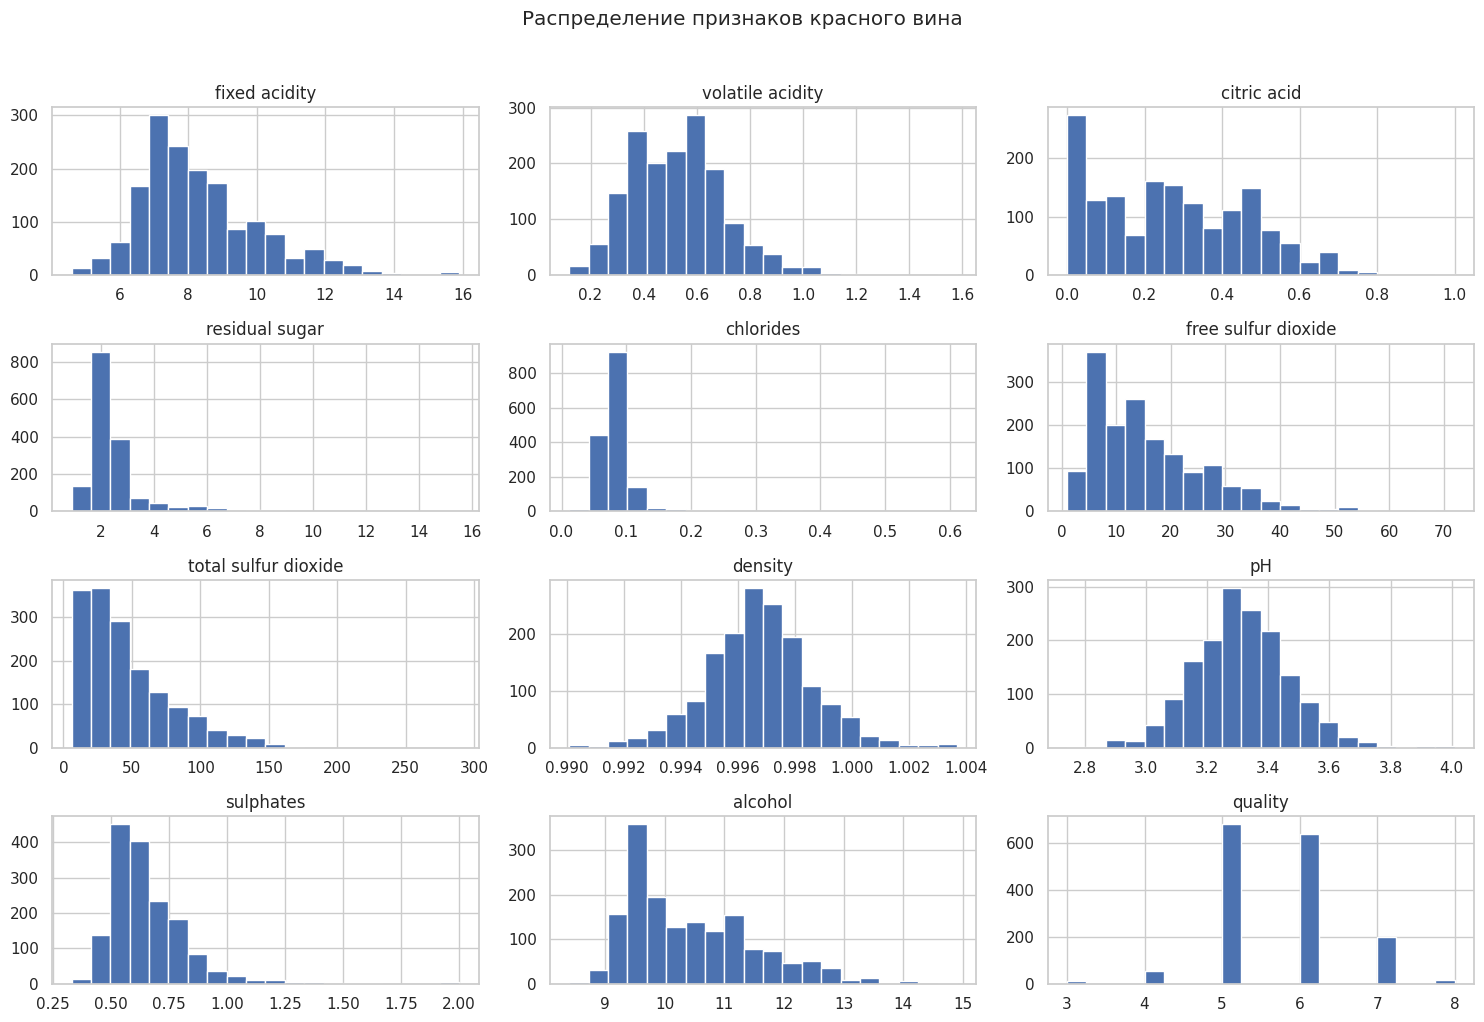

In [6]:
df_red.hist(bins=20, figsize=(15, 10))
plt.suptitle("Распределение признаков красного вина", y=1.02)
plt.tight_layout()
plt.show()

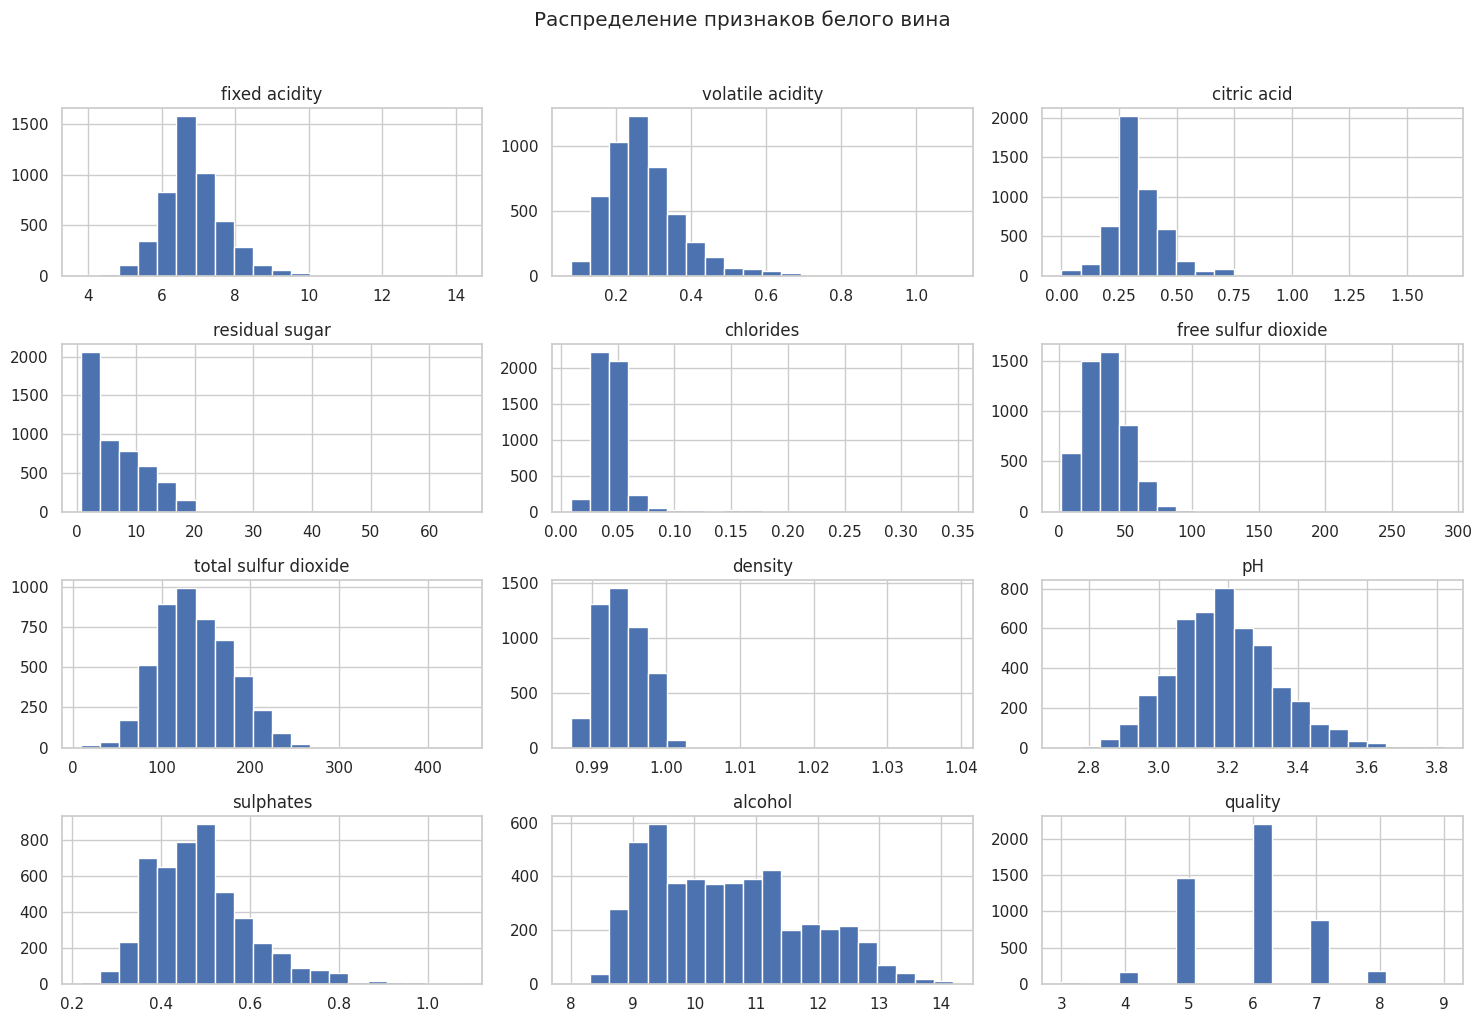

In [7]:
df_white.hist(bins=20, figsize=(15, 10))
plt.suptitle("Распределение признаков белого вина", y=1.02)
plt.tight_layout()
plt.show()

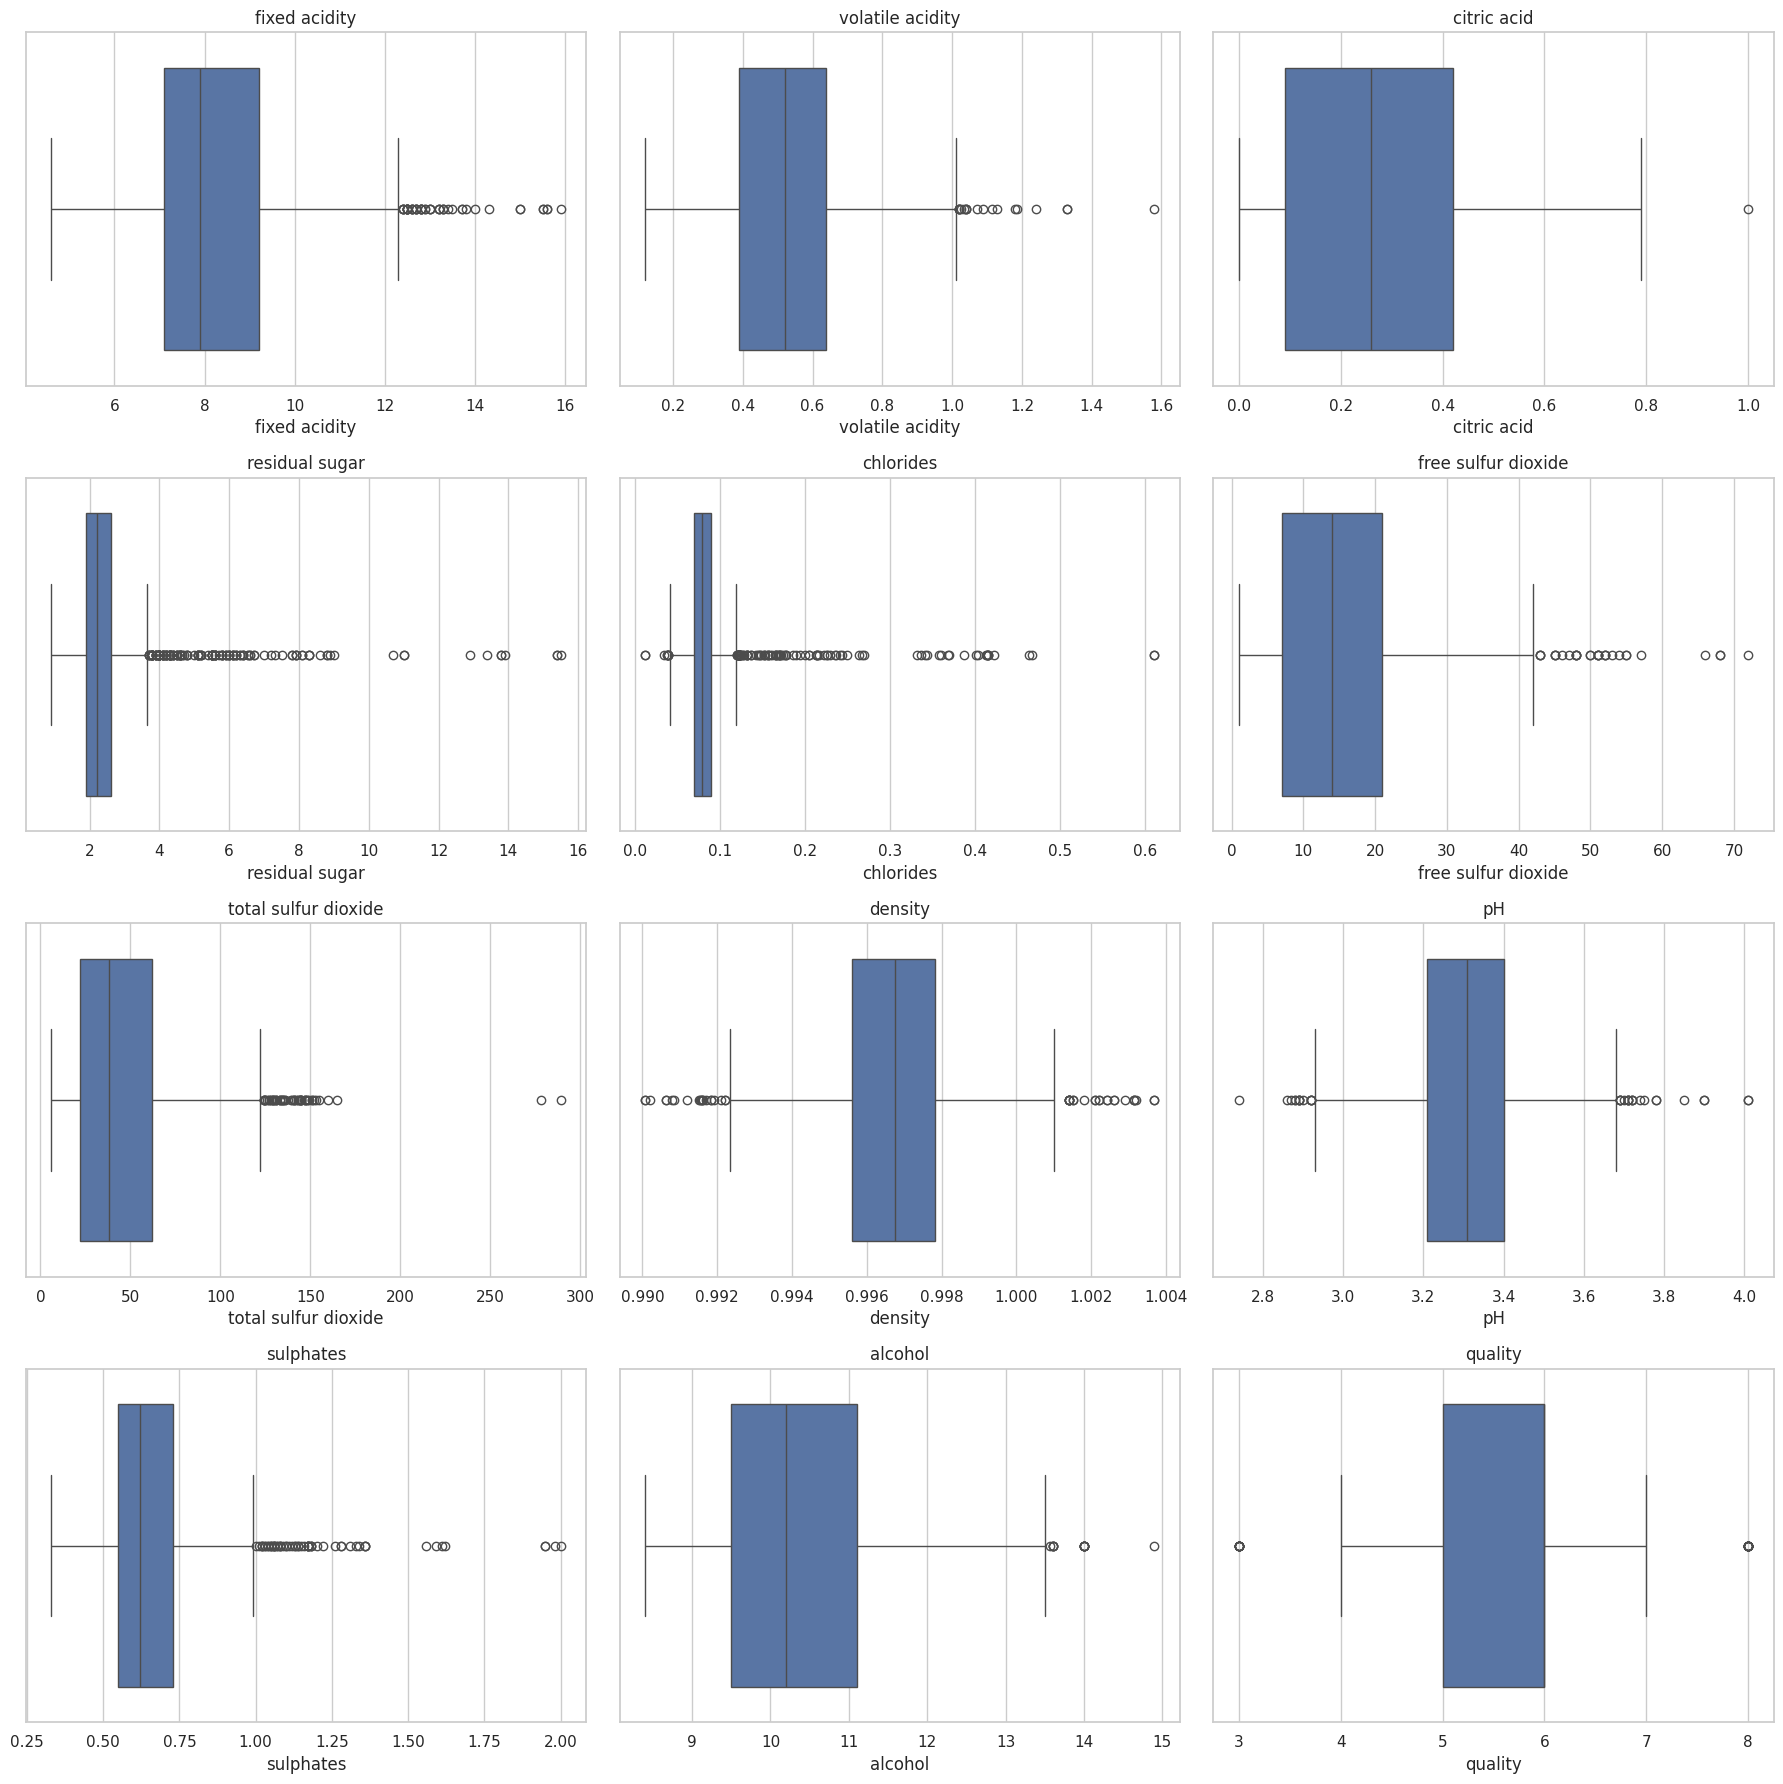

In [8]:
numeric_cols = df_red.select_dtypes(include=['float64', 'int64'])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 18))

for i, col in enumerate(numeric_cols):
    row = i // 3
    col_num = i % 3
    sns.boxplot(x=df_red[col], ax=axes[row, col_num])
    axes[row, col_num].set_title(col)

plt.tight_layout()
plt.show()

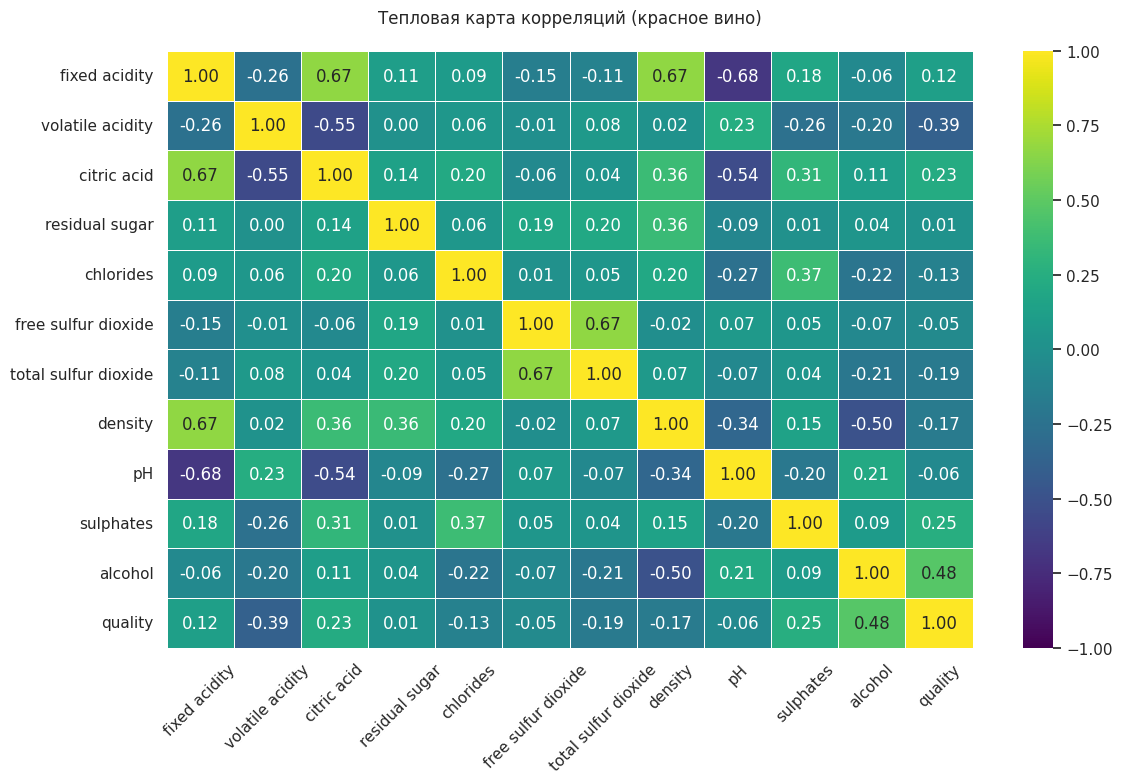

In [9]:
plt.figure(figsize=(12, 8))

corr = df_red.corr(numeric_only=True)
sns.heatmap(corr,
            annot=True,
            fmt=".2f",
            cmap='viridis',
            vmin=-1,
            vmax=1,
            linewidths=0.5)

plt.title('Тепловая карта корреляций (красное вино)', pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

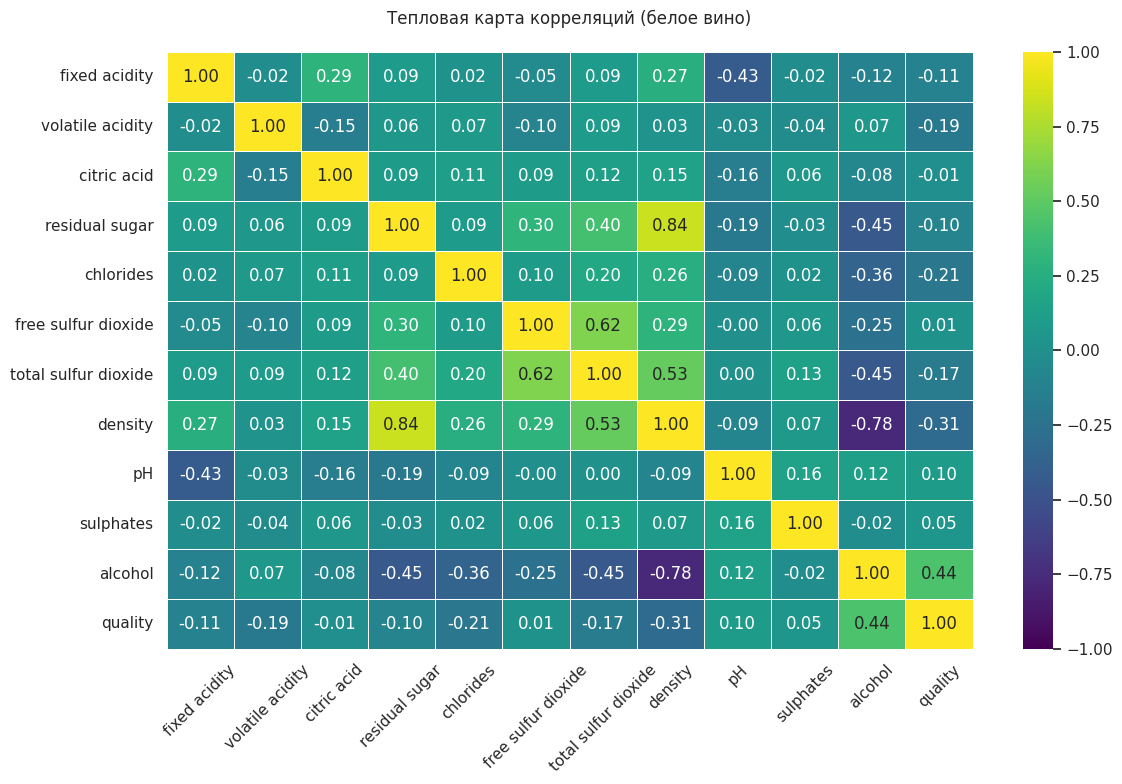

In [10]:
plt.figure(figsize=(12, 8))

corr = df_white.corr(numeric_only=True)
sns.heatmap(corr,
            annot=True,
            fmt=".2f",
            cmap='viridis',
            vmin=-1,
            vmax=1,
            linewidths=0.5)

plt.title('Тепловая карта корреляций (белое вино)', pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

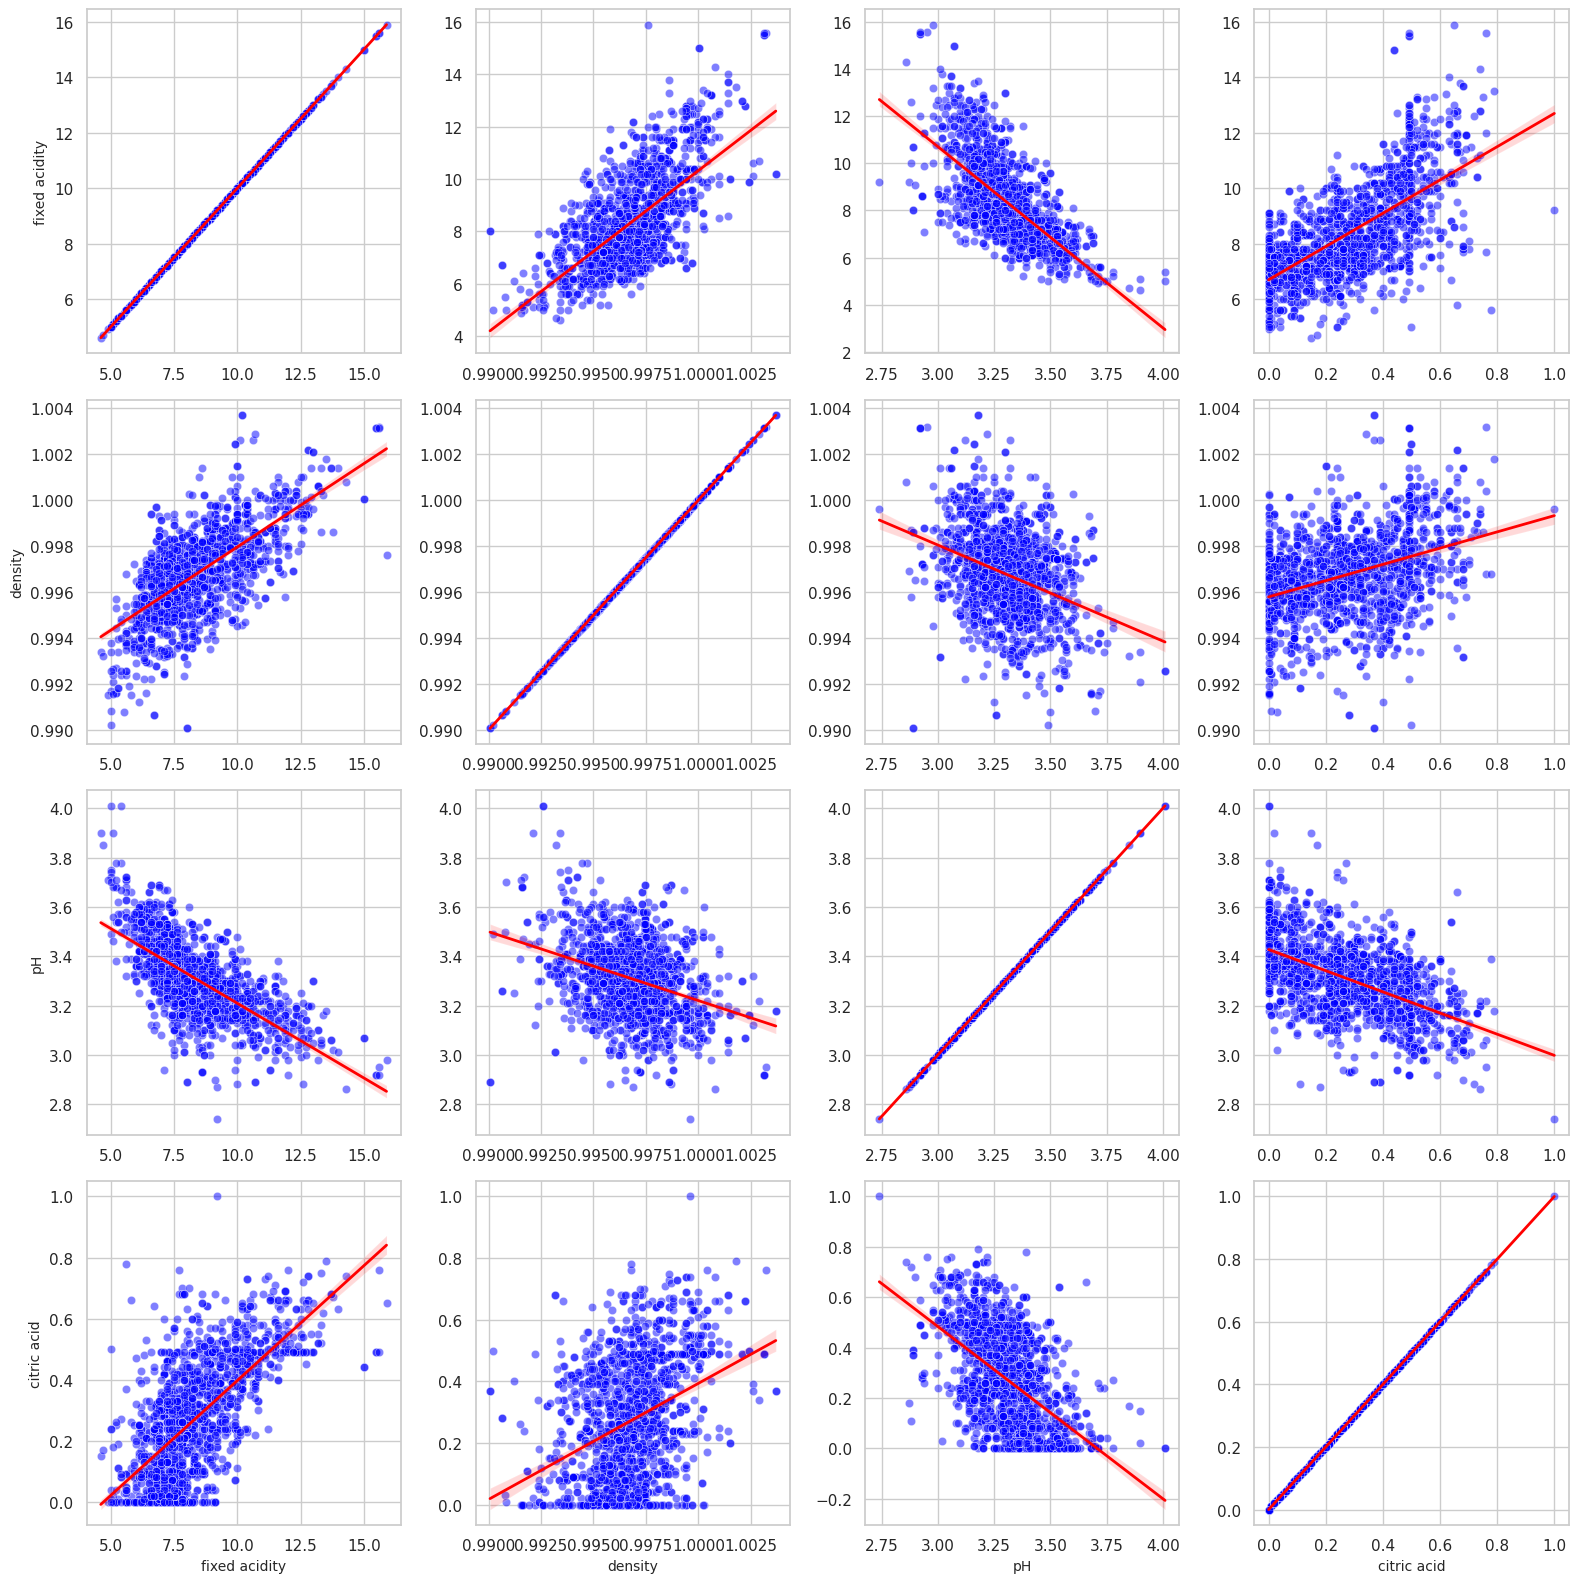

In [19]:
feature1 = 'fixed acidity'
feature2 = 'density'
feature3 = 'pH'
feature4 = 'citric acid'

features = [feature1, feature2, feature3, feature4]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i in range(4):
    for j in range(4):
        ax = axes[i, j]

        sns.scatterplot(
            x=df_red[features[j]],
            y=df_red[features[i]],
            alpha=0.5,
            ax=ax,
            color='blue'
        )

        sns.regplot(
            x=df_red[features[j]],
            y=df_red[features[i]],
            scatter=False,
            line_kws={'color': 'red', 'linewidth': 2},
            ax=ax
        )

        if i == 3:
            ax.set_xlabel(features[j], fontsize=10)
        else:
            ax.set_xlabel('')

        if j == 0:
            ax.set_ylabel(features[i], fontsize=10)
        else:
            ax.set_ylabel('')

plt.tight_layout()
plt.show()


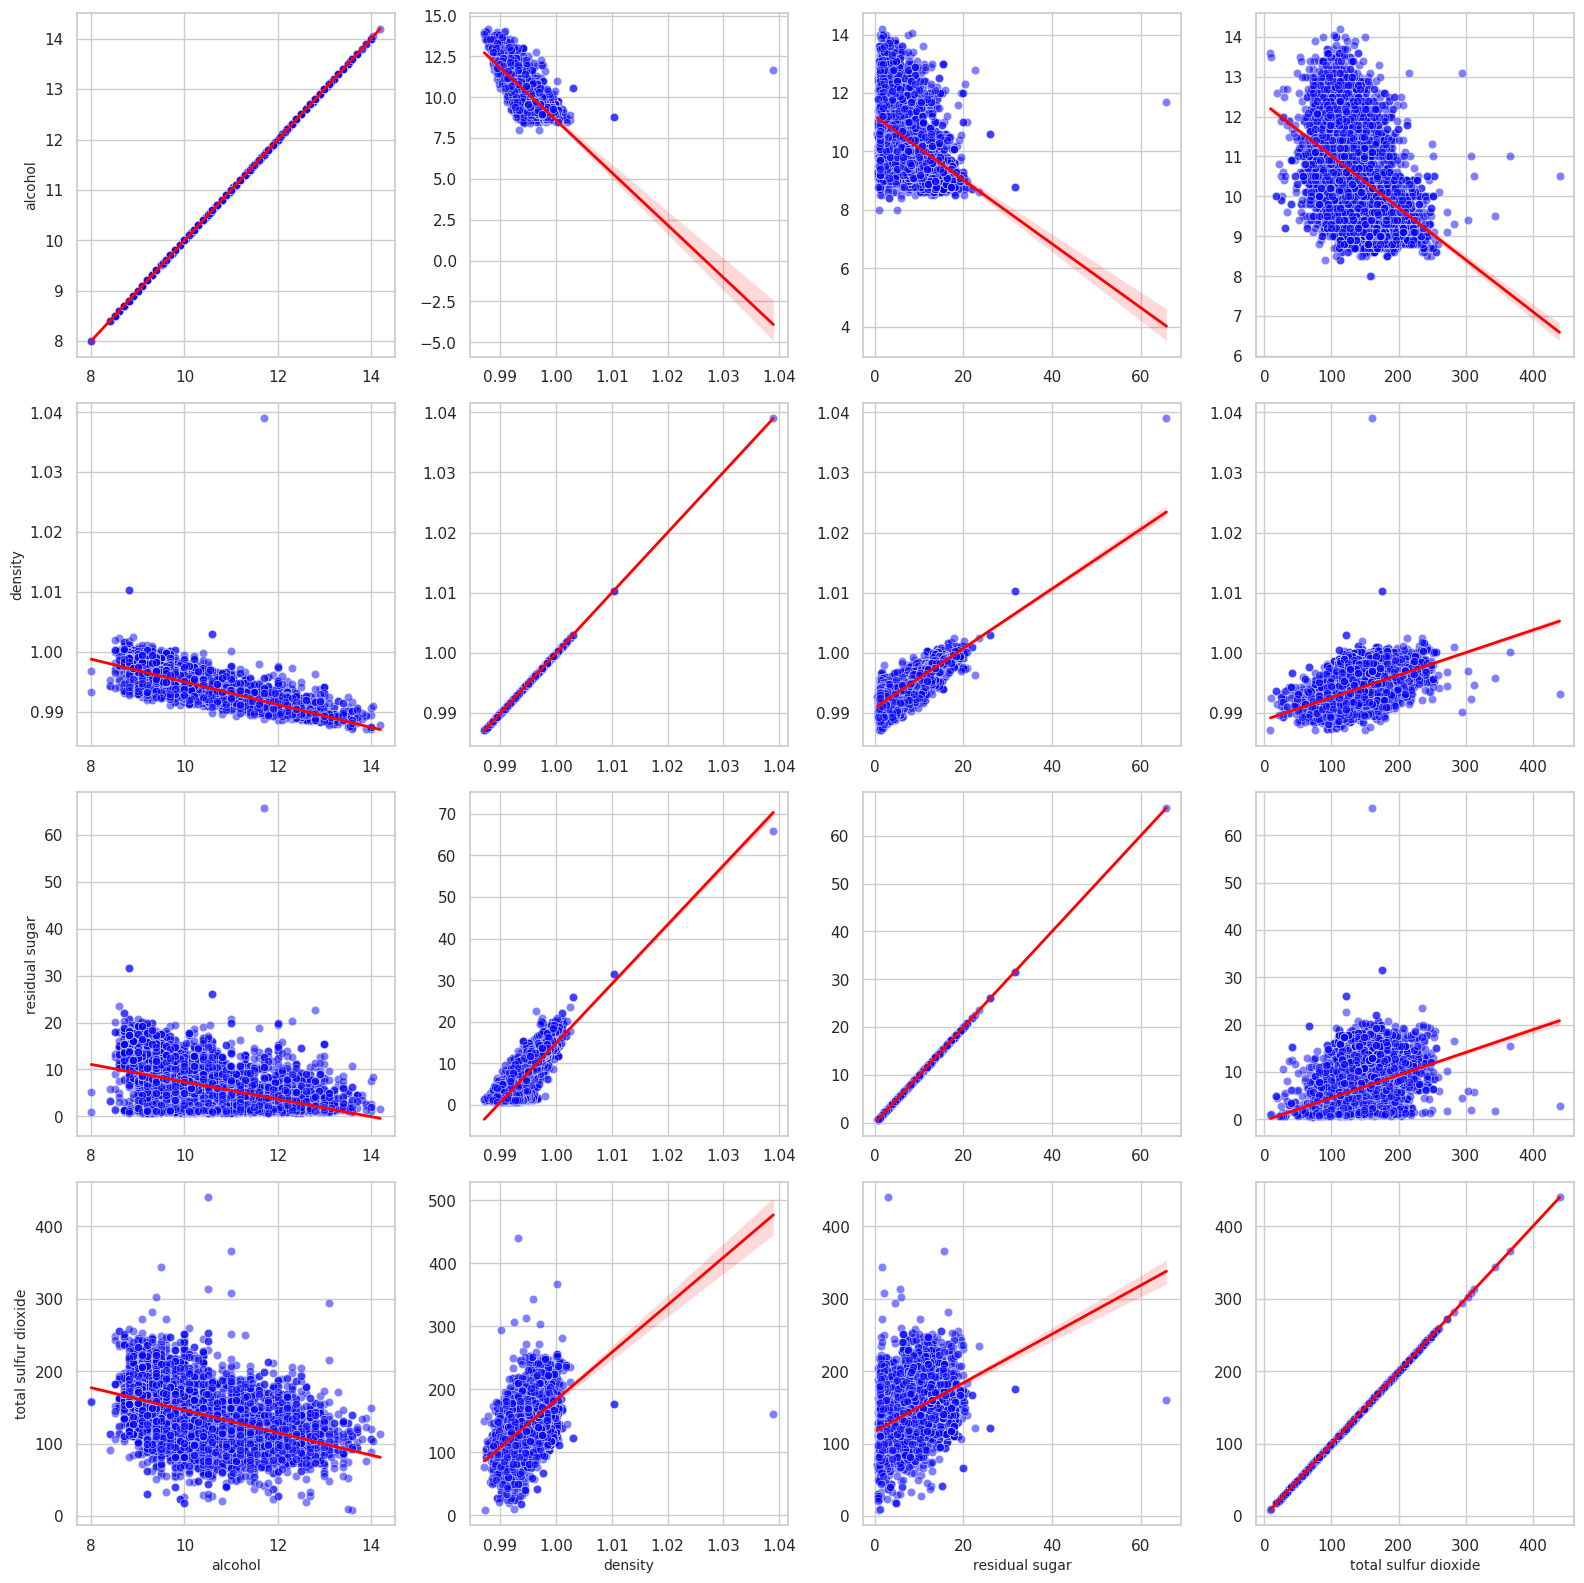

In [20]:
feature1 = 'alcohol'
feature2 = 'density'
feature3 = 'residual sugar'
feature4 = 'total sulfur dioxide'

features = [feature1, feature2, feature3, feature4]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i in range(4):
    for j in range(4):
        ax = axes[i, j]

        sns.scatterplot(
            x=df_white[features[j]],
            y=df_white[features[i]],
            alpha=0.5,
            ax=ax,
            color='blue'
        )

        sns.regplot(
            x=df_white[features[j]],
            y=df_white[features[i]],
            scatter=False,
            line_kws={'color': 'red', 'linewidth': 2},
            ax=ax
        )

        if i == 3:
            ax.set_xlabel(features[j], fontsize=10)
        else:
            ax.set_xlabel('')

        if j == 0:
            ax.set_ylabel(features[i], fontsize=10)
        else:
            ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [23]:
df_red['type'] = 'red'
df_white['type'] = 'white'

df = pd.concat([df_red, df_white])

print("=== 2.1. Очистка данных ===")

print("\nа) Дубликаты:")
print(f"Всего строк: {len(df)}")
print(f"Найдено дубликатов: {df.duplicated().sum()}")

df_cleaned = df.drop_duplicates()
print(f"Осталось строк после удаления: {len(df_cleaned)}")

print("\nб) Выбросы:")

def detect_outliers_zscore(data, threshold=3):
    z_scores = stats.zscore(data)
    return np.abs(z_scores) > threshold

numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.drop('quality')

outliers_count = {}
for col in numeric_cols:
    outliers = detect_outliers_zscore(df_cleaned[col])
    outliers_count[col] = outliers.sum()
    print(f"{col}: {outliers.sum()} выбросов")

df_cleaned = df_cleaned[~df_cleaned[numeric_cols].apply(detect_outliers_zscore).any(axis=1)]
print(f"\nОсталось строк после удаления выбросов: {len(df_cleaned)}")

print("\nв) Пропущенные значения:")
print(df_cleaned.isnull().sum())


=== 2.1. Очистка данных ===

а) Дубликаты:
Всего строк: 6497
Найдено дубликатов: 1177
Осталось строк после удаления: 5320

б) Выбросы:
fixed acidity: 108 выбросов
volatile acidity: 77 выбросов
citric acid: 26 выбросов
residual sugar: 42 выбросов
chlorides: 94 выбросов
free sulfur dioxide: 27 выбросов
total sulfur dioxide: 8 выбросов
density: 3 выбросов
pH: 32 выбросов
sulphates: 63 выбросов
alcohol: 2 выбросов

Осталось строк после удаления выбросов: 4889

в) Пропущенные значения:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64



Гистограммы распределения:


<Figure size 1200x600 with 0 Axes>

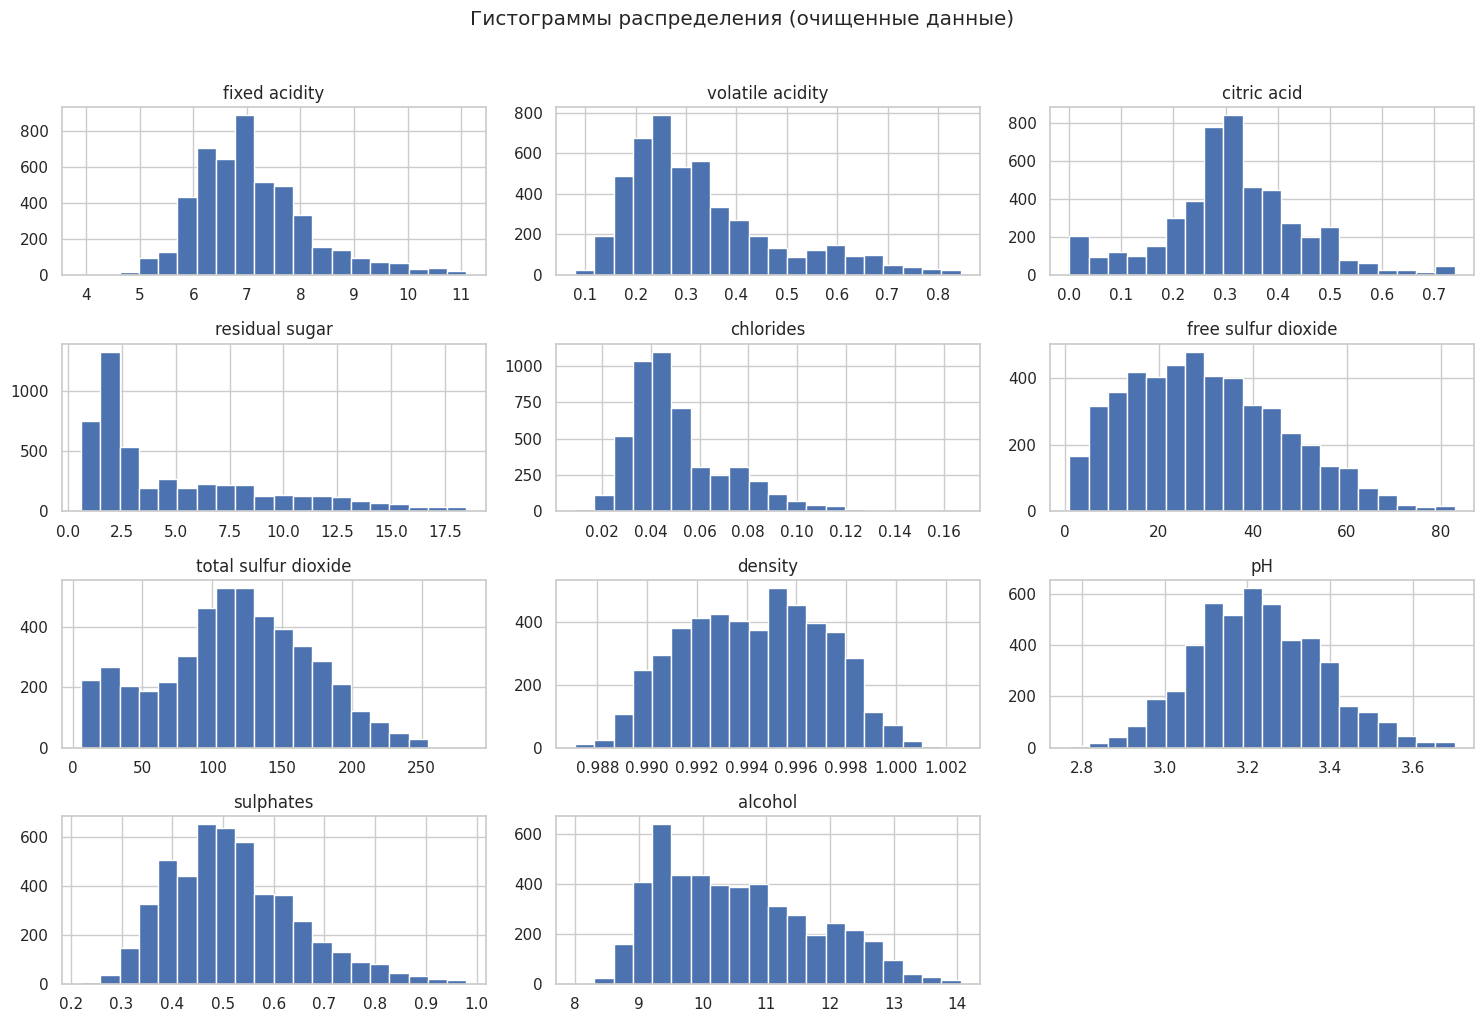

<Figure size 640x480 with 0 Axes>

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Гистограммы распределения
print("\nГистограммы распределения:")
df_cleaned[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Гистограммы распределения (очищенные данные)", y=1.02)
plt.tight_layout()
plt.show()

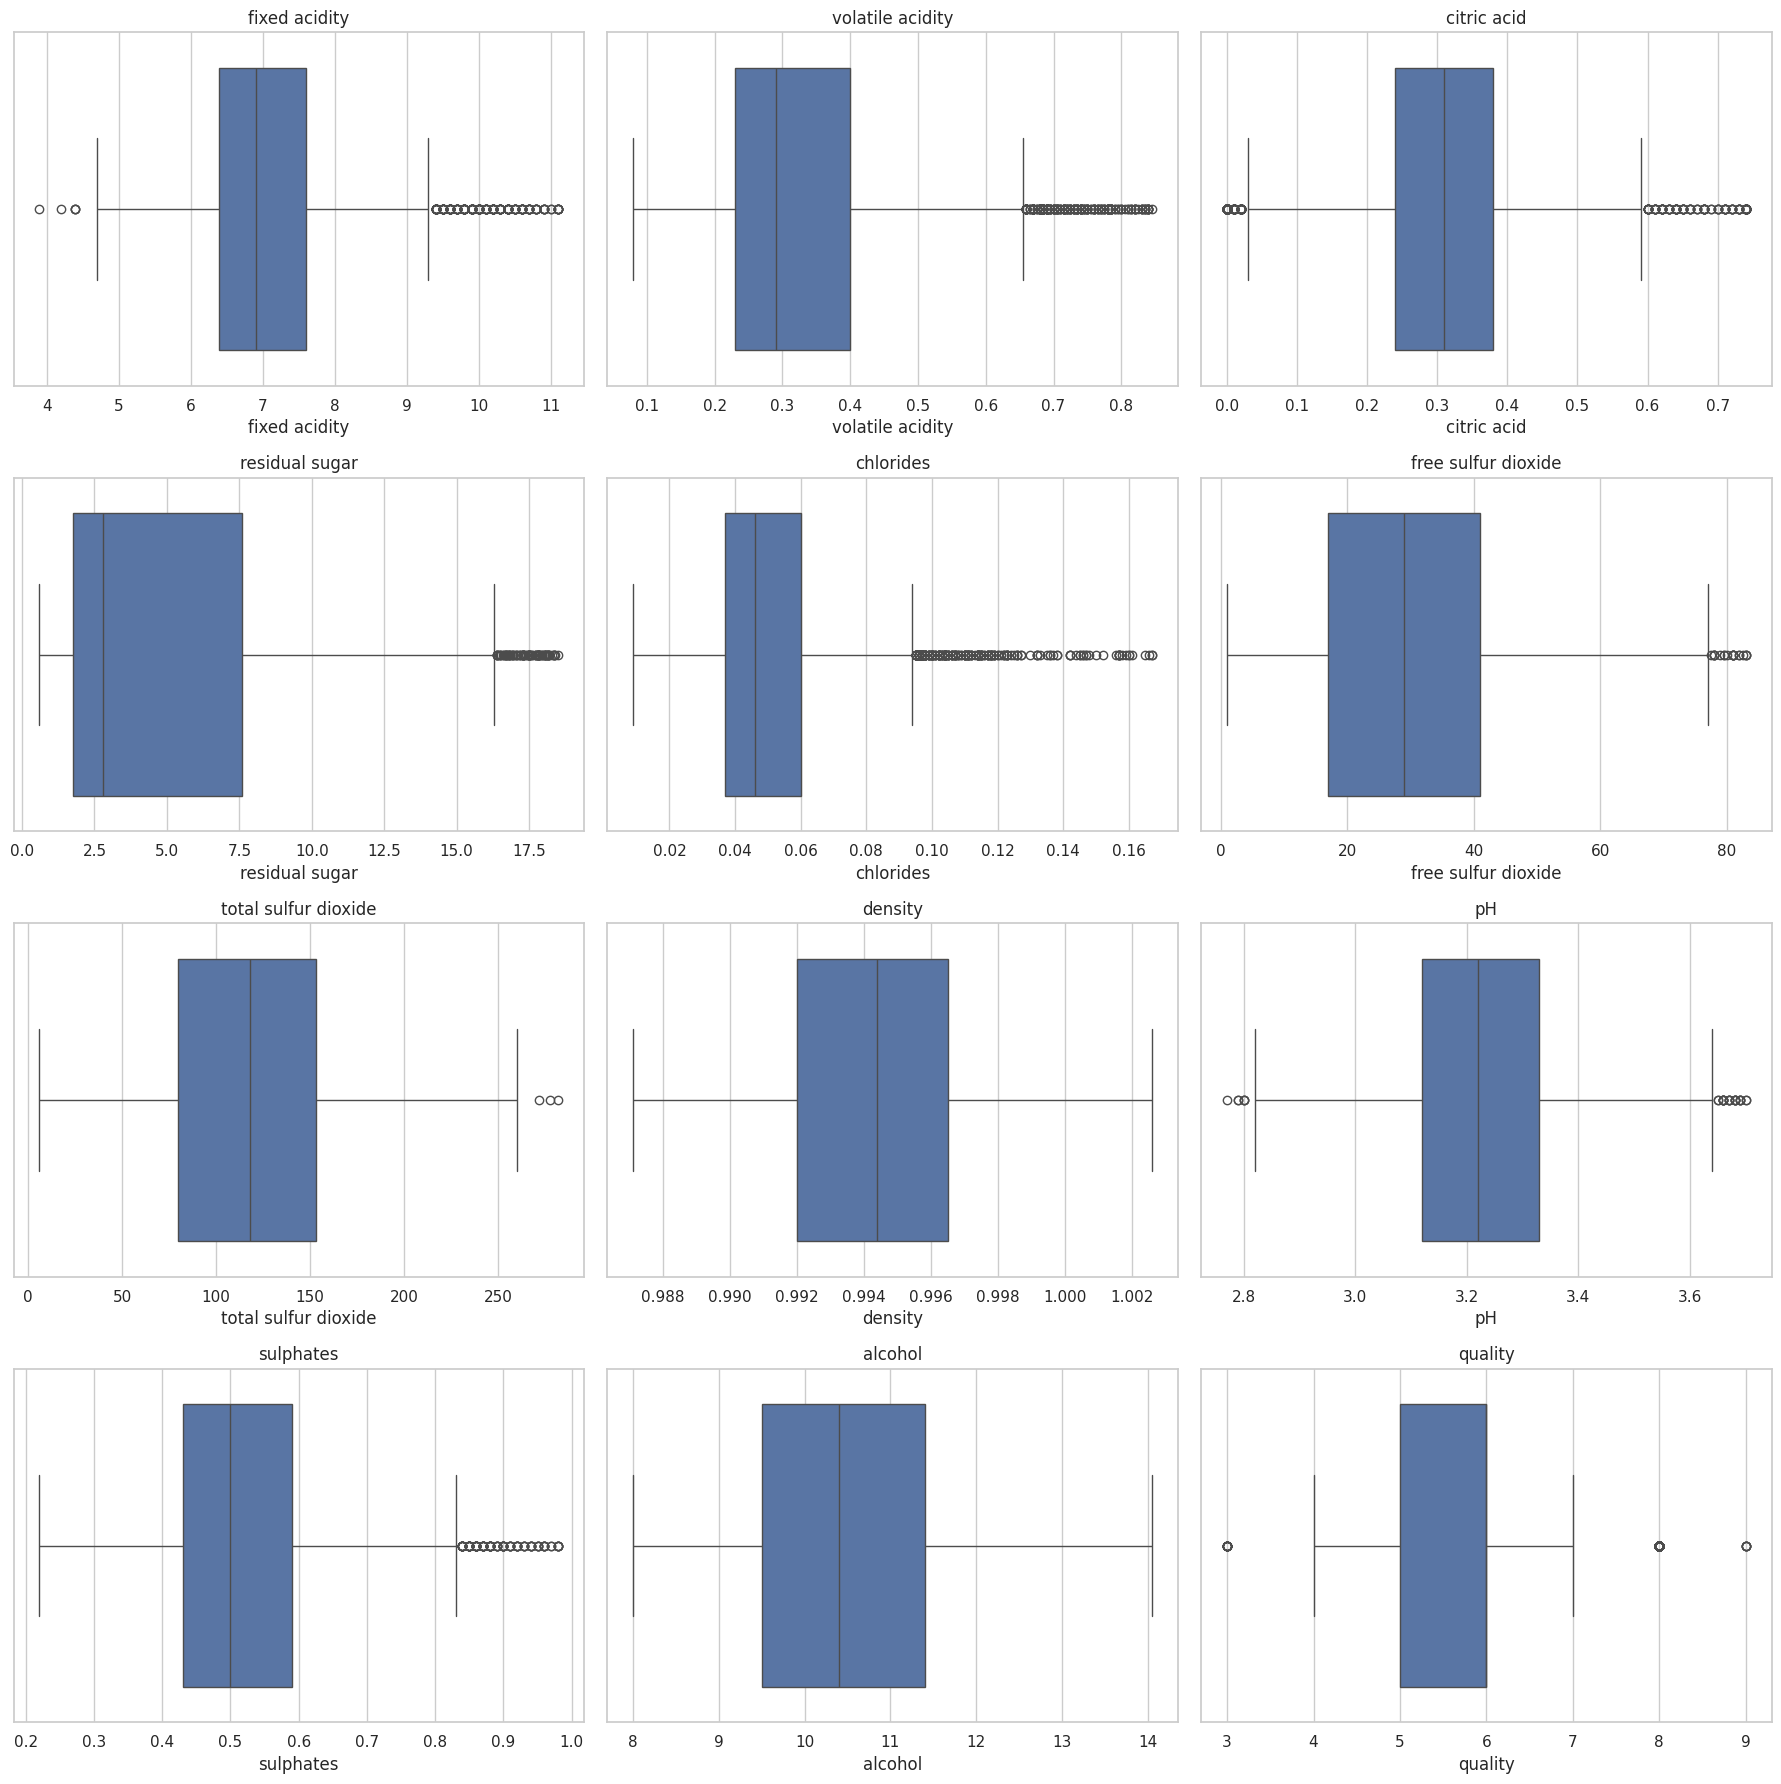

In [26]:
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 18))

for i, col in enumerate(numeric_cols):
    row = i // 3
    col_num = i % 3
    sns.boxplot(x=df_cleaned[col], ax=axes[row, col_num])
    axes[row, col_num].set_title(col)

plt.tight_layout()
plt.show()

In [35]:
sns.pairplot(df_cleaned)

Output hidden; open in https://colab.research.google.com to view.

In [31]:
df_cleaned['type'] = df_cleaned['type'].replace({'red': 1, 'white': 2})

<ipython-input-31-8602007ad2ee>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['type'] = df_cleaned['type'].replace({'red': 1, 'white': 2})


In [34]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_std = ss.fit_transform(df_cleaned)
df_std = pd.DataFrame(df_std)

df_std.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.889000e+03,4.889000e+03,4.889000e+03,4.889000e+03,4.889000e+03,4.889000e+03,4.889000e+03,4.889000e+03,4.889000e+03,4.889000e+03,4.889000e+03,4.889000e+03,4.889000e+03
mean,6.743543e-16,-4.650719e-17,-1.133613e-16,3.488040e-17,3.022968e-16,-2.325360e-17,-4.650719e-17,6.976079e-15,-1.023158e-15,2.790432e-16,-1.069665e-15,2.296293e-16,9.301439e-17
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00
min,-2.974873e+00,-1.675755e+00,-2.319512e+00,-1.033424e+00,-1.975501e+00,-1.779038e+00,-2.018089e+00,-2.575285e+00,-2.979360e+00,-2.361143e+00,-2.170372e+00,-3.248024e+00,-1.869108e+00
25%,-6.426215e-01,-6.738555e-01,-5.325682e-01,-7.651758e-01,-6.849599e-01,-8.020201e-01,-6.594069e-01,-8.235756e-01,-6.900815e-01,-7.144394e-01,-9.062588e-01,-9.456331e-01,5.350145e-01
50%,-1.761711e-01,-2.730957e-01,-1.137628e-02,-5.202534e-01,-2.701432e-01,-6.925703e-02,3.829468e-02,3.615934e-02,-3.600181e-02,-1.655381e-01,-1.477910e-01,2.055622e-01,5.350145e-01
75%,4.768594e-01,4.616307e-01,5.098157e-01,5.993918e-01,3.751272e-01,6.635061e-01,6.809145e-01,7.884274e-01,6.834858e-01,5.401921e-01,6.949510e-01,2.055622e-01,5.350145e-01
max,3.742012e+00,3.433933e+00,3.190231e+00,3.141919e+00,5.306837e+00,3.228177e+00,3.049428e+00,2.973587e+00,3.103581e+00,3.598357e+00,2.928217e+00,3.659148e+00,5.350145e-01


<Figure size 1200x600 with 0 Axes>

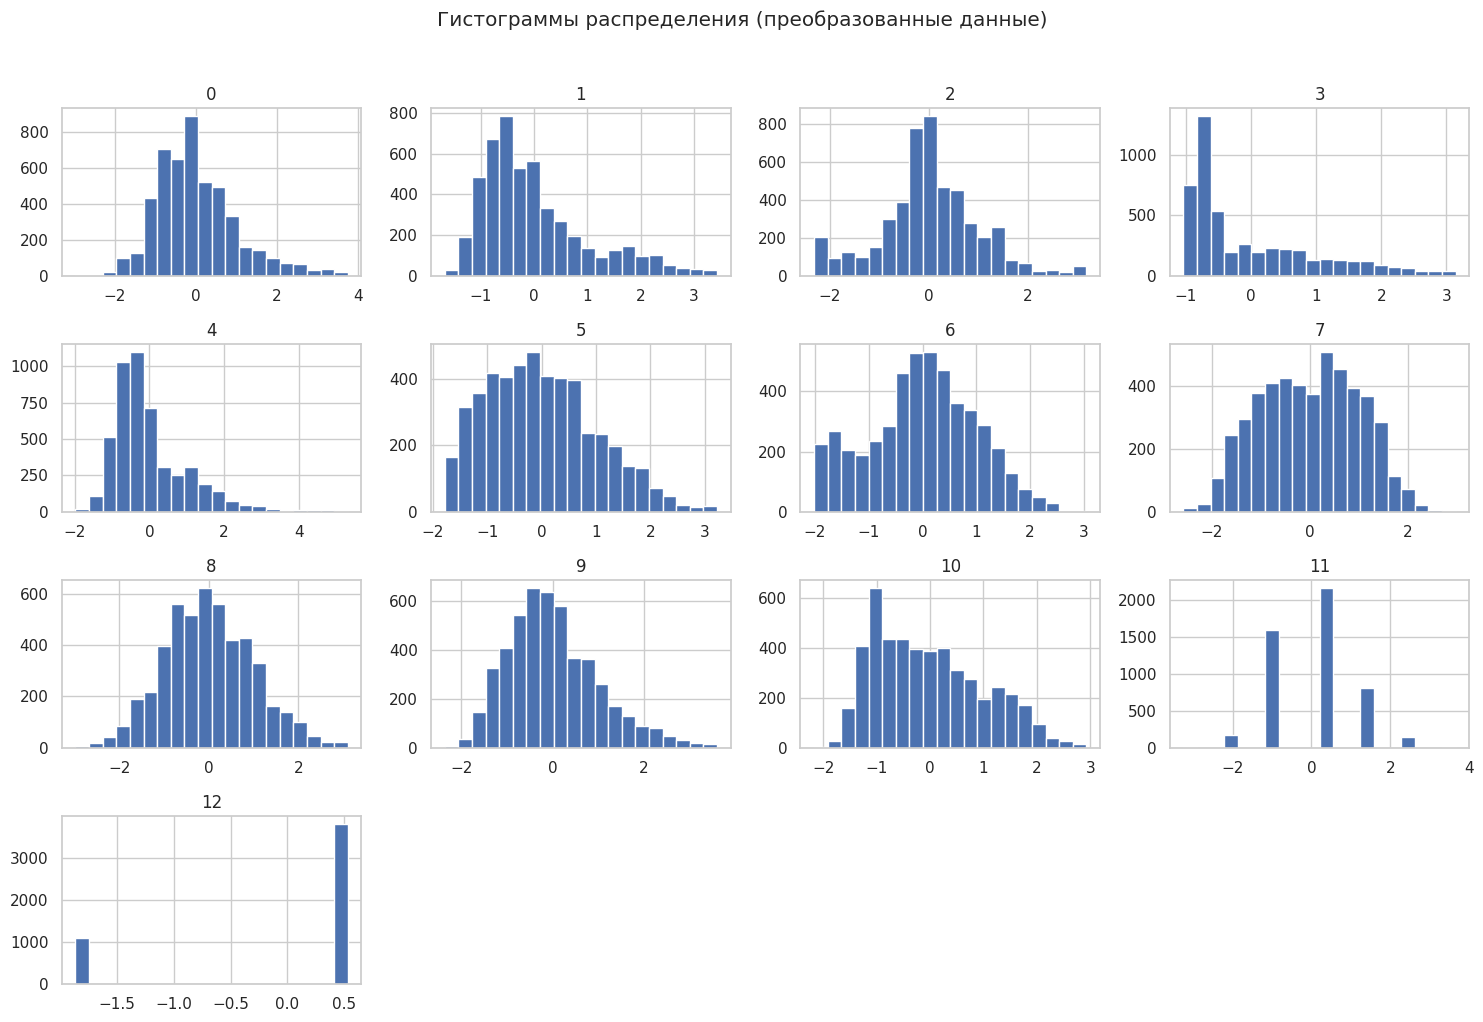

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

numeric_cols = df_std.select_dtypes(include=['int64', 'float64']).columns.tolist()

df_std[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Гистограммы распределения (преобразованные данные)", y=1.02)
plt.tight_layout()
plt.show()

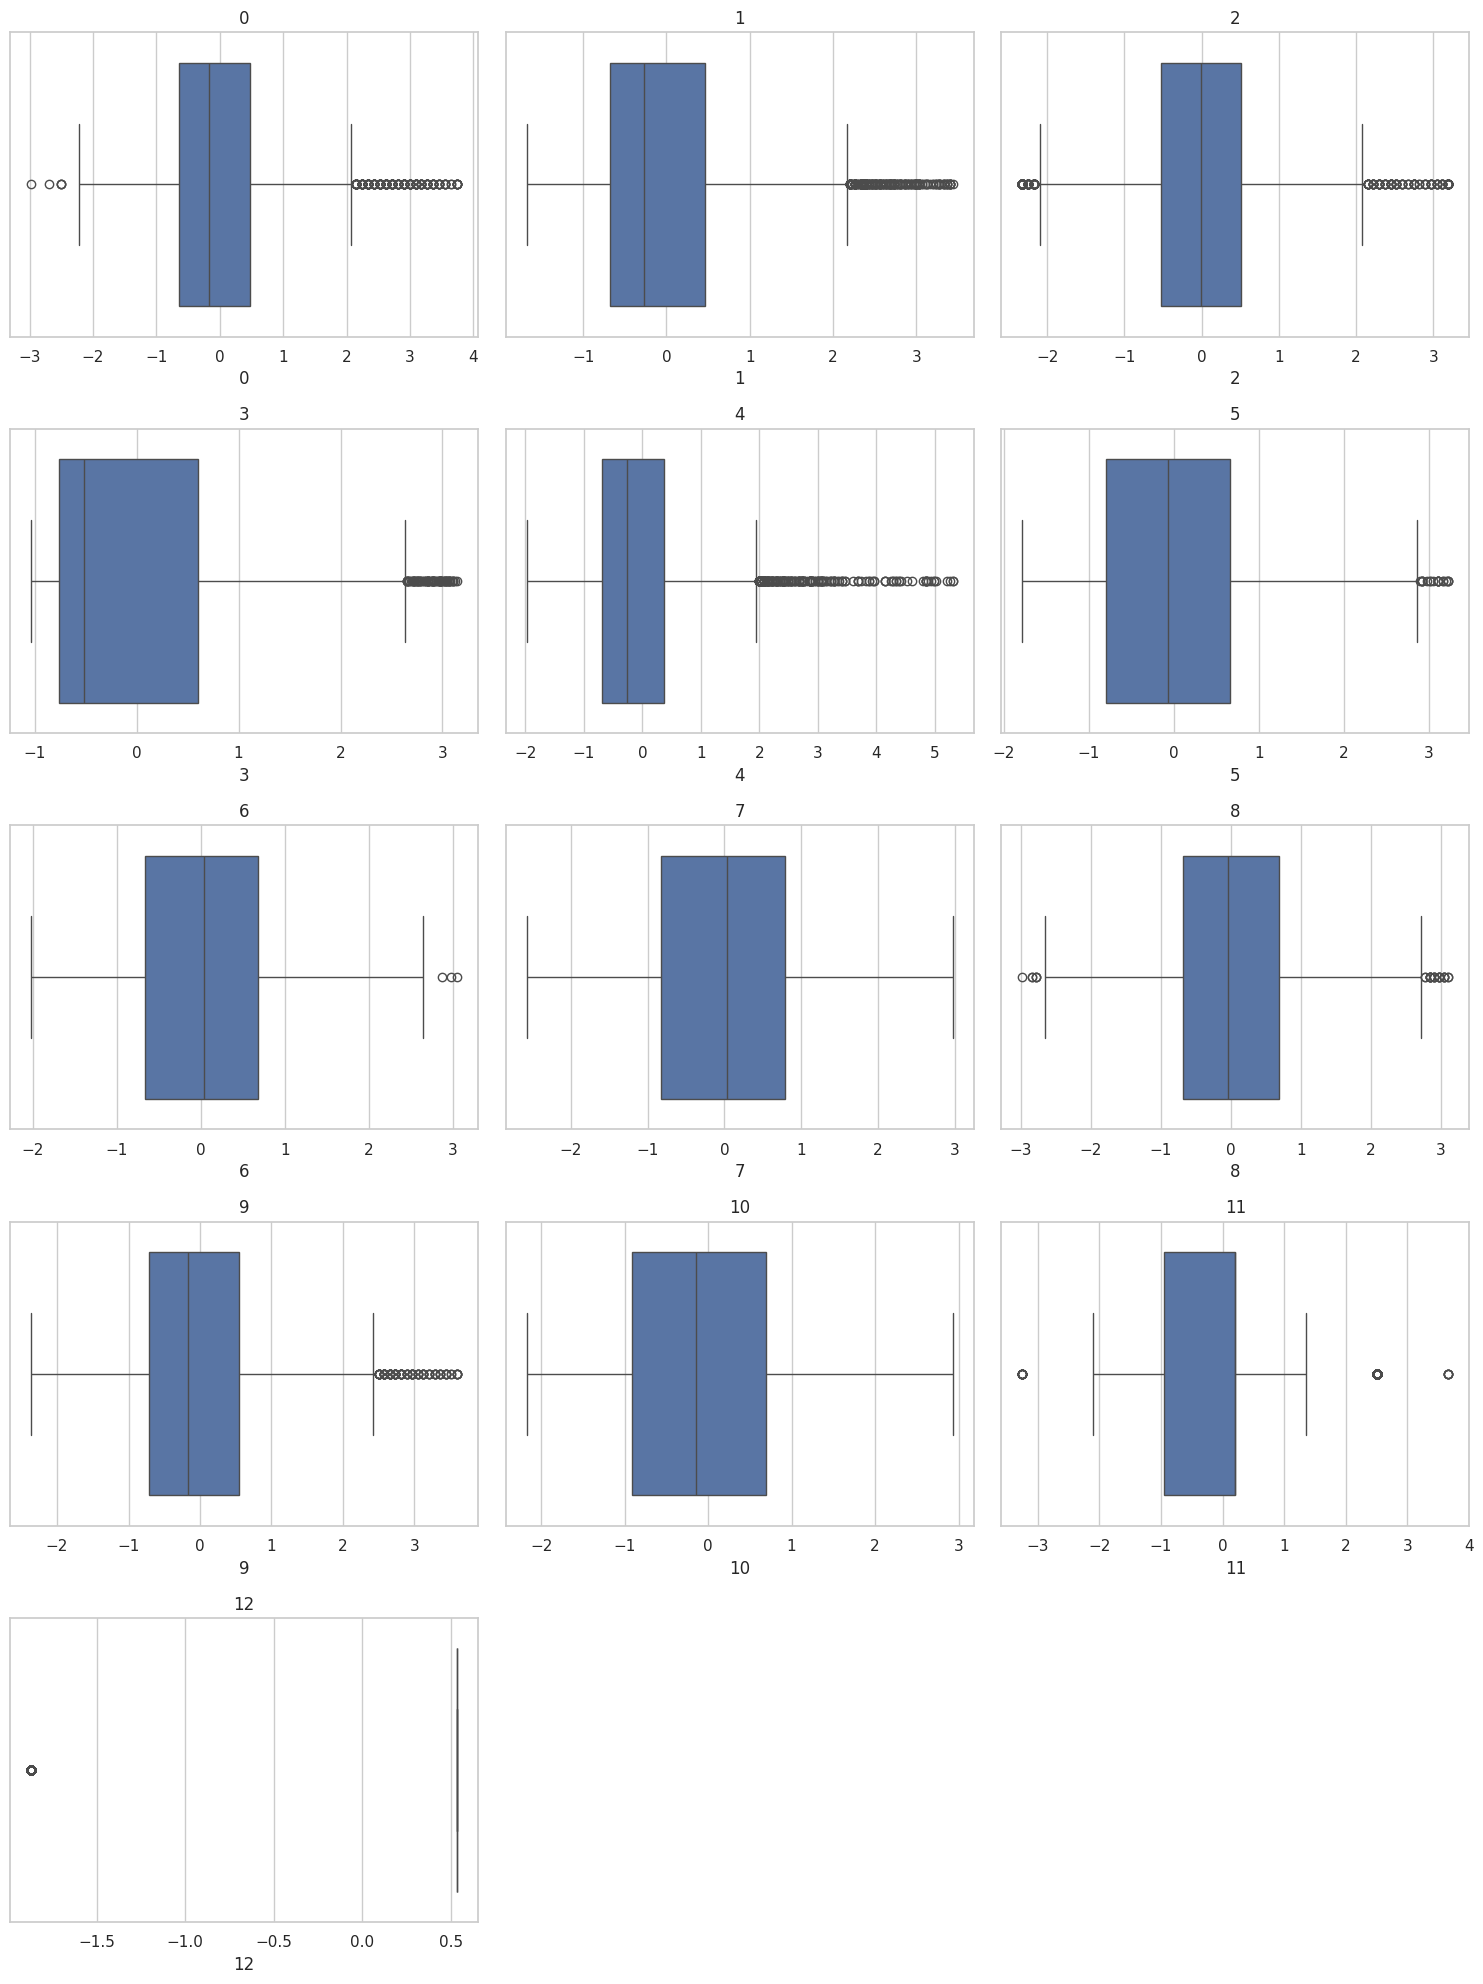

In [45]:
numeric_cols = df_std.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3
n_rows = (len(numeric_cols) // n_cols + 1)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df_std[col], ax=axes[i])
    axes[i].set_title(col)


for j in range(len(numeric_cols), n_rows * n_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [38]:
sns.pairplot(df_std)

Output hidden; open in https://colab.research.google.com to view.